In [9]:
%pip install pydot

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/tensorflow2_p38/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [10]:
%pip install graphviz

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/tensorflow2_p38/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
from numpy import unique, argmax
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np

In [13]:
#loading the MNIST dataseet
(x_train, y_train), (x_test, y_test) = load_data()

#reshaping to training and testing data
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))

x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))

In [14]:
#normalizing the values of pixels of images
x_train = x_train.astype('float32') / 255.0

x_test = x_test.astype('float32') / 255.0

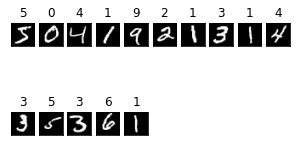

In [15]:
#plot the image
size_0, size_1 = 5, 3

fig = plt.figure(figsize=(size_0, size_1))

for i in range(size_0*size_1):
    
    ax = fig.add_subplot(2, 10, i+1, xticks=[], yticks=[])
    
    ax.imshow(np.squeeze(x_train[i]), cmap='gray')
    
    ax.set_title(y_train[i])

In [16]:
#determine the shape of the input images
img_shape = x_train.shape[1:] #hight, length, filter (channel) size

print(img_shape)

(28, 28, 1)


**Now we can define the model using `sequential` model**. 

That is, each layer is stacked one after another in a sequence. This is why we call it sequential model. It is different from the sequential neural network such as RNN, LSTM.

**Note that** Tensorflow 2D layer has the parameter `data_format`, which accepts 2 values: `channels_last` (default) or `channels_firs`t.

Its represents the ordering of the dimensions in the inputs:

`channels_last` corresponds to inputs with shape `(batch_size, height, width, channels)`

`channels_first` corresponds to inputs with shape `(batch_size, channels, height, width)`

Due to some reason, Sagemaker use `channel_first` as default, so I always explicitly define `data_format` in each Conv2D or MaxPool2D layer.

In [20]:
#define the model
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=img_shape, data_format='channels_last'))

model.add(MaxPool2D((2, 2), data_format='channels_last'))

model.add(Conv2D(48, (3, 3), padding='same', activation='relu', data_format='channels_last'))

model.add(MaxPool2D((2, 2), data_format='channels_last'))

model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(500, activation='relu'))

model.add(Dense(10, activation='softmax'))

In [21]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 48)        13872     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 7, 7, 48)         0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 7, 7, 48)          0         
                                                                 
 flatten_2 (Flatten)         (None, 2352)             

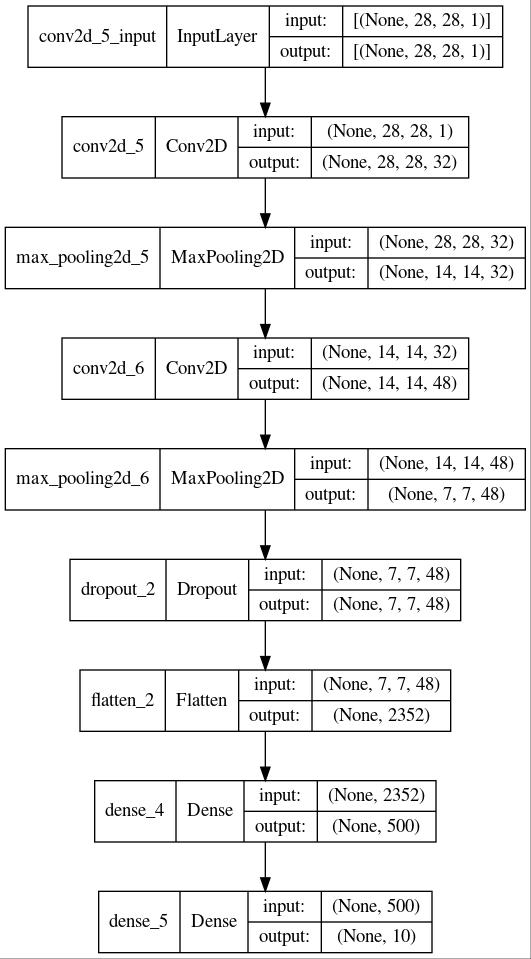

In [22]:
plot_model(model, 'model.jpg', show_shapes=True)

In [23]:
###train the model#########
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

x = model.fit(x_train, y_train, epochs=10, batch_size=128, verbose=2, validation_split=0.1)

Epoch 1/10
422/422 - 8s - loss: 0.2362 - accuracy: 0.9268 - val_loss: 0.0682 - val_accuracy: 0.9823 - 8s/epoch - 20ms/step
Epoch 2/10
422/422 - 5s - loss: 0.0770 - accuracy: 0.9757 - val_loss: 0.0425 - val_accuracy: 0.9882 - 5s/epoch - 13ms/step
Epoch 3/10
422/422 - 5s - loss: 0.0550 - accuracy: 0.9825 - val_loss: 0.0333 - val_accuracy: 0.9918 - 5s/epoch - 13ms/step
Epoch 4/10
422/422 - 5s - loss: 0.0433 - accuracy: 0.9861 - val_loss: 0.0327 - val_accuracy: 0.9912 - 5s/epoch - 13ms/step
Epoch 5/10
422/422 - 5s - loss: 0.0372 - accuracy: 0.9878 - val_loss: 0.0314 - val_accuracy: 0.9913 - 5s/epoch - 13ms/step
Epoch 6/10
422/422 - 5s - loss: 0.0326 - accuracy: 0.9894 - val_loss: 0.0272 - val_accuracy: 0.9932 - 5s/epoch - 13ms/step
Epoch 7/10
422/422 - 5s - loss: 0.0287 - accuracy: 0.9904 - val_loss: 0.0269 - val_accuracy: 0.9925 - 5s/epoch - 13ms/step
Epoch 8/10
422/422 - 5s - loss: 0.0262 - accuracy: 0.9916 - val_loss: 0.0325 - val_accuracy: 0.9917 - 5s/epoch - 13ms/step
Epoch 9/10
422/4

In [25]:
###evaluate the model##########
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

print('Accuracy:', accuracy*100)

Accuracy: 99.37999844551086


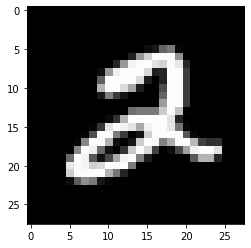

In [29]:
##visualize the result#######
image = x_train[5]

#we display the image which we want to predict
plt.imshow(np.squeeze(image), cmap='gray')

plt.show()

In [30]:
image = image.reshape(1,image.shape[0],image.shape[1],image.shape[2])

p = model.predict([image])

print('Predicted:', argmax(p))

Predicted: 2
